# Interval arithmetic

In these examples we will learn how to do arithmetic and find roots using interval arithmetic.

Documentation is here: https://juliaintervals.github.io/pages/tutorials/tutorialArithmetic/

In [3]:
# import Pkg; Pkg.add("IntervalArithmetic")
using IntervalArithmetic
using Plots

Create an interval and learn about interval arithmetic.

In [17]:
@show a = 1..2;

a = 1 .. 2 = [1, 2]


In [18]:
2 ± 1

[1, 3]

In [19]:
a = @interval(1, 2) # four ways to make an interval. Generally you want the "@" method
b = interval(1, 2)
c = interval(1)
d = @interval 1
@show a, b, c, d

(a, b, c, d) = ([1, 2], [1, 2], [1, 1], [1, 1])


([1, 2], [1, 2], [1, 1], [1, 1])

In [20]:
@interval sin(0.2)+cos(1.3)-exp(0.4)

[-1.02566, -1.02565]

In [21]:
a = 0.1
@show big(a);

big(a) = 0.1000000000000000055511151231257827021181583404541015625


0.1000000000000000055511151231257827021181583404541015625

In [22]:
correct = big"0.1"
@show correct;

correct = 0.1000000000000000000000000000000000000000000000000000000000000000000000000000002


In [23]:
I = interval(a)
II = @interval 0.1
III = a..a

@show correct ∈ I
@show correct ∈ II
@show correct ∈ III;

correct ∈ I = false
correct ∈ II = true
correct ∈ III = true


true

In [24]:
X = 1..2
Y = 3..4

@show X ∩ Y # typed \cap<TAB>
@show X ∪ Y # TYPED \cup<TAB>
@show X + Y
@show X*Y
@show X^3
@show X/Y;

X ∩ Y = ∅
X ∪ Y = [1, 4]
X + Y = [4, 6]
X * Y = [3, 8]
X ^ 3 = [1, 8]
X / Y = [0.25, 0.666667]


In [33]:
X = 1..2
Y = -1..1
Z = 0..2
@show X/Y
@show X/Z;

X / Y = [-∞, ∞]
X / Z = [0.5, ∞]


In [27]:
@show X-X
@show X/X
@show Z*(X+Y)
@show Z*X+Z*Y;

X - X = [-1, 1]
X / X = [0.5, 2]
Z * (X + Y) = [0, 6]
Z * X + Z * Y = [-2, 6]


In [28]:
@show sin(0..2/3*π)
@show log(-3.. -2)
@show log(-3..2)
@show √(-3..4);

sin(0 .. (2 / 3) * π) = [0, 1]
log(-3 .. -2) = ∅
log(-3 .. 2) = [-∞, 0.693148]
√(-3 .. 4) = [0, 2]


What happens when you evaluate a function on an interval? 
    
If it's monotonic, simply evaluate the end points. Otherwise use your knowledge of the function to define the appropriate result.

With user-defined functions, assembled from built-in functions, a problem arises when the independent variable appears twice. In general, the interval for the range will be too large.

In [39]:
f(x) = x - 1
@show X
@show f(X)
@show f(X) * f(X)
g(x) = (x-1)^2
@show g(X)
h(x) = x^2 - 2x + 1
@show h(X)
@show X^2
@show -2*X

X = [1, 2]
f(X) = [0, 1]
f(X) * f(X) = [0, 1]
g(X) = [0, 1]
h(X) = [-2, 3]
X ^ 2 = [1, 4]
-2X = [-4, -2]


[-4, -2]

The way to "solve" this problem is to evaluate a function on subintervals.

In [24]:
f(x) = x^2+3x-1
X = -2..2
@show f(X)
@show f(-2.. -1.5) ∪ f(-1.5.. 2);

f(X) = [-7, 9]
f(-2 .. -1.5) ∪ f(-1.5 .. 2) = [-5.5, 9]


We can make graphs to show what is going on by extending the idea of intervals to boxes in the plane (or higher dimensions.)

In [ ]:
X1 = IntervalBox(1..2, 2..3)
X2 = IntervalBox(-1..1, 0..2)
@show X1 + X2
@show sin.(X1);

X1 + X2 = [0, 3] × [2, 5]
sin.(X1) = [0.84147, 1] × [0.14112, 0.909298]


In [60]:
X = -2..2
X2 = [-2 .. 0.25, 0.25 .. 2]
f1 = f(X)
f2 = f.(X2)
box1 = IntervalBox(X, f1)
box2 = IntervalBox.(X2, f2)

2-element Vector{IntervalBox{2, Float64}}:
 [-2, 0.25] × [-7, 3.75]
 [0.25, 2] × [-0.1875, 9]

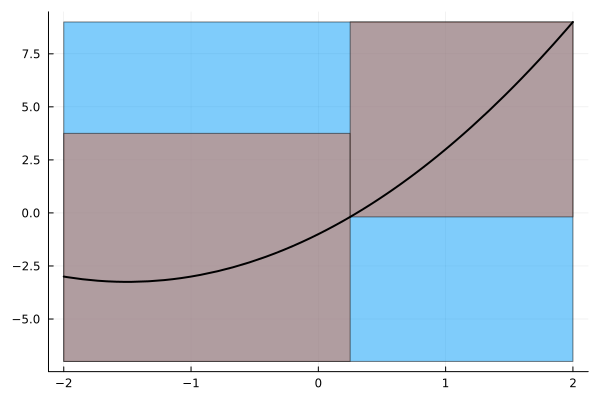

In [61]:
using Plots
plot(box1)
plot!(box2)
plot!(f, -2, 2, leg=false, color=:black, linewidth=2)

More details can be found here:
https://juliaintervals.github.io/pages/tutorials/tutorialRootFinding/

The IntervalRootFinding package automates this subdivision for us until the resulting intervals are small enough.

In [4]:
using IntervalArithmetic, IntervalRootFinding

[ Info: Precompiling IntervalRootFinding [d2bf35a9-74e0-55ec-b149-d360ff49b807]


In [67]:
f(x) = sin(x)
X = -pi/4 .. 9*pi/4
@show f(X)
roots(f, X, Bisection)

f(X) = [-1, 1]


3-element Vector{Root{Interval{Float64}}}:
 Root([3.14159, 3.1416], :unknown)
 Root([6.28318, 6.28319], :unknown)
 Root([-2.46461e-08, 3.42811e-08], :unknown)

In [68]:
roots(f, X, Newton)

3-element Vector{Root{Interval{Float64}}}:
 Root([6.28318, 6.28319], :unique)
 Root([3.14159, 3.1416], :unique)
 Root([-9.929e-11, 3.33653e-12], :unique)

In [63]:
f(x) = x^2-2x
X = -4..4
rts = roots(f, X) 

2-element Vector{Root{Interval{Float64}}}:
 Root([1.99999, 2.00001], :unique)
 Root([-1.72982e-09, 1.38862e-09], :unique)

In [64]:
roots(f, X, Bisection)

4-element Vector{Root{Interval{Float64}}}:
 Root([2, 2.00001], :unknown)
 Root([1.99999, 2], :unknown)
 Root([-2.3921e-08, 3.24651e-08], :unknown)
 Root([1.99999, 2.00001], :unknown)

In [65]:
h(x) = cos(x) * sin(1 / x)
roots(h, 0.05..1)

6-element Vector{Root{Interval{Float64}}}:
 Root([0.318309, 0.31831], :unique)
 Root([0.0795774, 0.0795775], :unique)
 Root([0.159154, 0.159155], :unique)
 Root([0.0530516, 0.0530517], :unique)
 Root([0.0636619, 0.063662], :unique)
 Root([0.106103, 0.106104], :unique)

In [12]:
import Polynomials # has a roots function that conflicts with IntervalRootFinding
p1 = Polynomials.fromroots(1:8)
IntervalRootFinding.roots( x -> p1(x), 0..9)

8-element Vector{Root{Interval{Float64}}}:
 Root([0.999999, 1.00001], :unique)
 Root([7.99999, 8.00001], :unique)
 Root([6.99999, 7.00001], :unique)
 Root([5.99999, 6.00001], :unique)
 Root([2.99999, 3.00001], :unique)
 Root([3.99999, 4.00001], :unique)
 Root([4.99999, 5.00001], :unique)
 Root([1.99999, 2.00001], :unique)

In [11]:
@show r2 = rand(5)
p2 = Polynomials.fromroots(r2)
roots(x -> p2(x), 0..1)

r2 = rand(5) = [0.11649723729950823, 0.9210707812248832, 0.5692901358058872, 0.07906786548190736, 0.25257356295176836]


5-element Vector{Root{Interval{Float64}}}:
 Root([0.56929, 0.569291], :unique)
 Root([0.116497, 0.116498], :unique)
 Root([0.92107, 0.921071], :unique)
 Root([0.252573, 0.252574], :unique)
 Root([0.0790678, 0.0790679], :unique)

Now see what happens with a function that is designed to be particularly pathological. It is approximately a parabola with a small log function which is undefined at $x=4/3$. For $x$ very close to $4/3$ the function is negative and the function is positive at all floating point values near $4/3$. Due to limitations of floating point numbers, we can't even evaluate $f$ at exactly $4/3$.

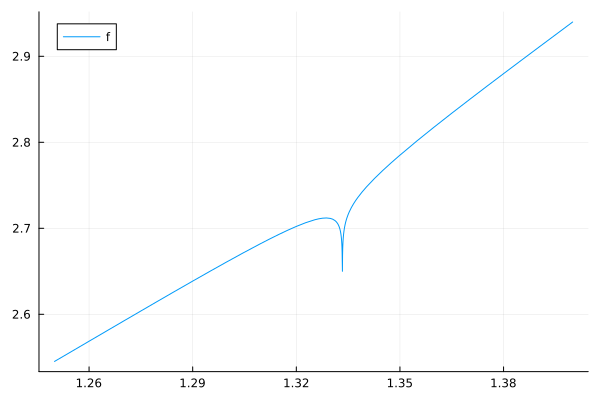

In [6]:
f(x) = 1/80 * log(abs(3*(1 - x) + 1)) + x^2 + 1
plot(f, 1.25, 1.4, label = "f")

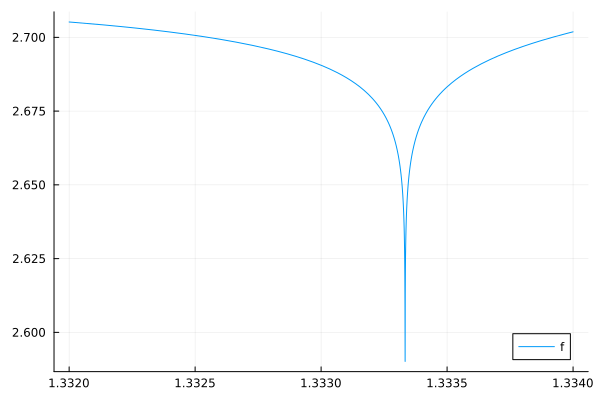

In [12]:
plot(f, 1.332, 1.334, label = "f")

In [7]:
x = 4/3
@show f(x)

f(x) = 2.327232110413813


2.327232110413813

In [15]:
BigFloat(4/3)

1.3333333333333332593184650249895639717578887939453125

In [17]:
f(prevfloat(x)), f(x), f(nextfloat(x))

(2.344560789927811, 2.327232110413813, 2.335896450170813)

In [14]:
1/80 .* (log(abs(3*(1 - prevfloat(x)) + 1)), log(abs(3*(1 - x) + 1)), log(abs(3*(1 - nextfloat(x)) + 1)))

(-0.4332169878499659, -0.45054566736396445, -0.4418813276069652)

So we can't evaluate $f$ at exactly 4/3. There are no floats where $f$ is negative, so numerically it appears that there are no roots.

What happens if we use interval arithmetic? Our operations on the intervals should detect the singularity. Can we find the roots?

In [18]:
x = @interval 4/3

[1.33333, 1.33334]

In [19]:
4/3 in x

true

In [20]:
f(x)

[-∞, 2.3359]

Where did this infinity come from? Evaluate the function bit by bit from the inside out.

In [21]:
3*(1-x)

[-1.00001, -0.999999]

In [22]:
abs(3*(1 - x) + 1)

[0, 4.4409e-16]

In [23]:
log(abs(3*(1 - x) + 1)) / 80

[-∞, -0.441881]

These functions work on sets of functions too.

In [72]:
using StaticArrays
g( (x, y) ) = SVector(sin(x), cos(y)) # required for performance reasons, regular arrays are not supported
X = IntervalBox(-3..3, 2)
rts = roots(g, X)

2-element Vector{Root{IntervalBox{2, Float64}}}:
 Root([-1.19115e-21, 1.0588e-22] × [-1.5708, -1.57079], :unique)
 Root([-1.19115e-21, 1.0588e-22] × [1.57079, 1.5708], :unique)